<a id="section-one"></a>
## 1 Import Libraries and download data

<a id="define-device"></a>
### 1.2 Define device

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Load Data OE 

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(2021)
Final_Data_S1 = pd.read_csv("/content/drive/MyDrive/Final_Data_S1.csv")
Final_Data_S2 = pd.read_csv("/content/drive/MyDrive/Final_Data_S2.csv")

Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin([3.0, 4.0])].index,'labels']=1
Final_Data_S2.loc[Final_Data_S2[Final_Data_S2.labels.isin([3.0, 4.0])].index,'labels']=1

!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin([0.0])].index,'labels']=0
Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin([1.0])].index,'labels']=1
Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin([2.0])].index,'labels']=1

Final_Data_S2.loc[Final_Data_S2[Final_Data_S2.labels.isin([0.0])].index,'labels']=0
Final_Data_S2.loc[Final_Data_S2[Final_Data_S2.labels.isin([1.0])].index,'labels']=1
Final_Data_S2.loc[Final_Data_S2[Final_Data_S2.labels.isin([2.0])].index,'labels']=1

labels_S1 = Final_Data_S1.labels
labels_S2 = Final_Data_S2.labels
Data_S1 = Final_Data_S1.drop(['time', 'labels'], axis= 1)
Data_S2 = Final_Data_S2.drop(['time', 'labels'], axis= 1)

from sklearn.decomposition import PCA
pca = PCA(n_components=9)
principalComponents_S1 = pca.fit_transform(Data_S1)
pca = PCA(n_components=9)
principalComponents_S2 = pca.fit_transform(Data_S2)

sm = SMOTE(random_state=2)
principalComponents_S1, labels_S1 = sm.fit_resample(principalComponents_S1, labels_S1)
principalComponents_S2, labels_S2 = sm.fit_resample(principalComponents_S2, labels_S2)

Final_Data_S1 = pd.DataFrame(principalComponents_S1)
Final_Data_S2 = pd.DataFrame(principalComponents_S2)

Final_Data_S1['labels'] = labels_S1
Final_Data_S2['labels'] = labels_S2

Data_0 = Final_Data_S1[Final_Data_S1.labels == 0].iloc[:1045]
#Data_1 = Final_Data_S1[Final_Data_S1.labels == 1].iloc[:600]
Data_2 = Final_Data_S1[Final_Data_S1.labels == 1].iloc[:300]
frames = [Data_0, Data_2]
Final_Data_S1 = pd.concat(frames)

Data_0 = Final_Data_S2[Final_Data_S2.labels == 0].iloc[:772]
#Data_1 = Final_Data_S2[Final_Data_S2.labels == 1].iloc[:500]
Data_2 = Final_Data_S2[Final_Data_S2.labels == 1].iloc[:200]
frames = [Data_0, Data_2]
Final_Data_S2 = pd.concat(frames)

Final_Data_S1 = Final_Data_S1.sample(frac = 1)
Final_Data_S2 = Final_Data_S2.sample(frac = 1)

Source_train = Final_Data_S1.iloc[200:,:]
Source_test = Final_Data_S1.iloc[:200,:]

Target_train = Final_Data_S2.iloc[150:,:]
Target_test = Final_Data_S2.iloc[:150,:]

Source_train.to_csv('/content/drive/MyDrive/SFDA/data/office/Source_train.csv', index=False)
Source_test.to_csv('/content/drive/MyDrive/SFDA/data/office/Source_test.csv', index=False)
Target_train.to_csv('/content/drive/MyDrive/SFDA/data/office/Target_train.csv', index=False)
Target_test.to_csv('/content/drive/MyDrive/SFDA/data/office/Target_test.csv', index=False)



#Load Data AR: 3 Activities

In [ ]:
import pandas as pd 
import numpy as np
np.random.seed(2021)
!wget http://casas.wsu.edu/datasets/hh101.zip
!wget http://casas.wsu.edu/datasets/hh105.zip
!unzip '/content/hh105.zip'
!unzip /content/hh101.zip
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

Final_Data_S1 = pd.read_csv("/content/hh101/hh101.ann.features.csv")
Final_Data_S2 = pd.read_csv("/content/hh105/hh105.ann.features.csv")
Final_Data_S1.rename(columns={"activity": "labels"}, inplace= True)
Final_Data_S2.rename(columns={"activity": "labels"}, inplace= True)

Final_Data_S1 = Final_Data_S1.drop(['lastSensorEventHours', 'lastSensorEventSeconds', 'lastSensorDayOfWeek','lastSensorID'], axis= 1)
Final_Data_S2 = Final_Data_S2.drop(['lastSensorEventHours', 'lastSensorEventSeconds','lastSensorDayOfWeek', 'lastSensorID'], axis= 1)

Final_Data_S1 = Final_Data_S1[Final_Data_S1.labels.isin(['Cook_Breakfast',  'Watch_TV', 'Toilet' ])]
Final_Data_S2 = Final_Data_S2[Final_Data_S2.labels.isin([ 'Cook_Breakfast',  'Watch_TV', 'Toilet' ])]

Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin(['Watch_TV'])].index,'labels']=0
Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin(['Toilet'])].index,'labels']=1
Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin(['Cook_Breakfast'])].index,'labels']=2

Final_Data_S2.loc[Final_Data_S2[Final_Data_S2.labels.isin(['Watch_TV'])].index,'labels']=0
Final_Data_S2.loc[Final_Data_S2[Final_Data_S2.labels.isin(['Toilet'])].index,'labels']=1
Final_Data_S2.loc[Final_Data_S2[Final_Data_S2.labels.isin(['Cook_Breakfast'])].index,'labels']=2



Data_0 = Final_Data_S1[Final_Data_S1.labels == 0].iloc[:4000]#2000#4000
Data_2 = Final_Data_S1[Final_Data_S1.labels == 1].iloc[:2000]#2000
Data_3 = Final_Data_S1[Final_Data_S1.labels == 2].iloc[:2000]#2000
frames = [Data_0, Data_2, Data_3]
Final_Data_S1 = pd.concat(frames)

Data_0 = Final_Data_S2[Final_Data_S2.labels == 0].iloc[:2000]#1000#2000
Data_2 = Final_Data_S2[Final_Data_S2.labels == 1].iloc[:1000]#1000
Data_3 = Final_Data_S2[Final_Data_S2.labels == 2].iloc[:1000]#1000
frames = [Data_0, Data_2, Data_3]
Final_Data_S2 = pd.concat(frames)


Final_Data_S1 = Final_Data_S1.sample(frac = 1)
Final_Data_S2 = Final_Data_S2.sample(frac = 1)


Source_train = Final_Data_S1.iloc[200:,:]#1000
Source_test = Final_Data_S1.iloc[:200,:]

Target_train = Final_Data_S2.iloc[150:,:]#500
Target_test = Final_Data_S2.iloc[:150,:]

Source_train.to_csv('/content/drive/MyDrive/SFDA/data/office/Source_train.csv', index=False)
Source_test.to_csv('/content/drive/MyDrive/SFDA/data/office/Source_test.csv', index=False)
Target_train.to_csv('/content/drive/MyDrive/SFDA/data/office/Target_train.csv', index=False)
Target_test.to_csv('/content/drive/MyDrive/SFDA/data/office/Target_test.csv', index=False)


#Load Data AR: 5 Activities

In [ ]:
import pandas as pd 
import numpy as np
np.random.seed(2021)
!wget http://casas.wsu.edu/datasets/hh101.zip
!wget http://casas.wsu.edu/datasets/hh105.zip
!unzip '/content/hh101.zip'
!unzip /content/hh105.zip

Final_Data_S1 = pd.read_csv("/content/hh101/hh101.ann.features.csv")
Final_Data_S2 = pd.read_csv("/content/hh105/hh105.ann.features.csv")
Final_Data_S1.rename(columns={"activity": "labels"}, inplace= True)
Final_Data_S2.rename(columns={"activity": "labels"}, inplace= True)

Final_Data_S1 = Final_Data_S1.drop(['lastSensorEventHours', 'lastSensorEventSeconds', 'lastSensorDayOfWeek','lastSensorID'], axis= 1)
Final_Data_S2 = Final_Data_S2.drop(['lastSensorEventHours', 'lastSensorEventSeconds','lastSensorDayOfWeek', 'lastSensorID'], axis= 1)

Final_Data_S1 = Final_Data_S1[Final_Data_S1.labels.isin(['Cook_Dinner', 'Cook_Breakfast', 'Cook_Lunch', 'Watch_TV', 'Toilet' ])]
Final_Data_S2 = Final_Data_S2[Final_Data_S2.labels.isin(['Cook_Dinner', 'Cook_Breakfast', 'Cook_Lunch', 'Watch_TV', 'Toilet' ])]

Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin(['Watch_TV'])].index,'labels']=0
Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin(['Cook_Lunch'])].index,'labels']=1
Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin(['Toilet'])].index,'labels']=2
Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin(['Cook_Breakfast'])].index,'labels']=3
Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin(['Cook_Dinner'])].index,'labels']=4

Final_Data_S2.loc[Final_Data_S2[Final_Data_S2.labels.isin(['Watch_TV'])].index,'labels']=0
Final_Data_S2.loc[Final_Data_S2[Final_Data_S2.labels.isin(['Cook_Lunch'])].index,'labels']=1
Final_Data_S2.loc[Final_Data_S2[Final_Data_S2.labels.isin(['Toilet'])].index,'labels']=2
Final_Data_S2.loc[Final_Data_S2[Final_Data_S2.labels.isin(['Cook_Breakfast'])].index,'labels']=3
Final_Data_S2.loc[Final_Data_S2[Final_Data_S2.labels.isin(['Cook_Dinner'])].index,'labels']=4

Data_0 = Final_Data_S1[Final_Data_S1.labels == 0].iloc[:2000]#2000#4000
Data_1 = Final_Data_S1[Final_Data_S1.labels == 1].iloc[:2000]#4000
Data_2 = Final_Data_S1[Final_Data_S1.labels == 2].iloc[:2000]#2000
Data_3 = Final_Data_S1[Final_Data_S1.labels == 3].iloc[:2000]#4000
Data_4 = Final_Data_S1[Final_Data_S1.labels == 4].iloc[:2000]#
frames = [Data_0, Data_1, Data_2, Data_3, Data_4]
Final_Data_S1 = pd.concat(frames)

Data_0 = Final_Data_S2[Final_Data_S2.labels == 0].iloc[:1000]#1000#2000
Data_1 = Final_Data_S2[Final_Data_S2.labels == 1].iloc[:1000]#2000
Data_2 = Final_Data_S2[Final_Data_S2.labels == 2].iloc[:1000]#
Data_3 = Final_Data_S2[Final_Data_S2.labels == 3].iloc[:1000]#2000
Data_4 = Final_Data_S2[Final_Data_S2.labels == 4].iloc[:1000]#
frames = [Data_0, Data_1, Data_2, Data_3, Data_4]
Final_Data_S2 = pd.concat(frames)


Final_Data_S1 = Final_Data_S1.sample(frac = 1)
Final_Data_S2 = Final_Data_S2.sample(frac = 1)

Source_train = Final_Data_S1.iloc[200:,:]#1000#
Source_test = Final_Data_S1.iloc[:200,:]

Target_train = Final_Data_S2.iloc[150:,:]#500#
Target_test = Final_Data_S2.iloc[:150,:]

Source_train.to_csv('/content/drive/MyDrive/SFDA/data/office/Source_train.csv', index=False)
Source_test.to_csv('/content/drive/MyDrive/SFDA/data/office/Source_test.csv', index=False)
Target_train.to_csv('/content/drive/MyDrive/SFDA/data/office/Target_train.csv', index=False)
Target_test.to_csv('/content/drive/MyDrive/SFDA/data/office/Target_test.csv', index=False)

In [3]:
!pip install transformers

In [4]:
# main
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

# machine learning
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset,Dataset

# other
import gc
import random
import transformers
import warnings
warnings.simplefilter('ignore')

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

<a id="define-random-seed"></a>
### 1.3 Define random seed

In [6]:
SEED = 13

def random_seed(SEED):
    random.seed(SEED)
    os.environ['PYTHONHASHSEED'] = str(SEED)
    np.random.seed(SEED)
    torch.manual_seed(SEED)
    torch.cuda.manual_seed(SEED)
    torch.cuda.manual_seed_all(SEED)
    torch.backends.cudnn.deterministic = True

random_seed(SEED)

<a id="download-data"></a>
### 1.4 Download data

In [7]:
Source_train = pd.read_csv("/content/drive/MyDrive/SFDA/data/office/Source_train.csv")
Source_test = pd.read_csv("/content/drive/MyDrive/SFDA/data/office/Source_test.csv")


<a id="prepare-training-data-and-verification-data-in-5-combinations"></a>
### 2.5 Prepare training data and verification data in 5 combinations

In [8]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

In [9]:
folds = Source_train.copy()
Fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for n, (train_index, val_index) in enumerate(Fold.split(folds, folds["labels"])):
    folds.loc[val_index, 'fold'] = int(n)
folds['fold'] = folds['fold'].astype(int)
print(folds.groupby(['fold',"labels"]).size())

fold  labels
0     0.0       180
      1.0        49
1     0.0       180
      1.0        49
2     0.0       179
      1.0        50
3     0.0       179
      1.0        50
4     0.0       179
      1.0        50
dtype: int64


In [10]:
folds

,0,1,2,3,4,5,6,7,8,labels,fold
0,-12.526083,-83.551522,12.693542,-12.994269,-8.637807,-0.652616,-1.983182,0.721094,-0.099042,0.0,1
1,86.985552,-92.776024,-90.934828,-19.704535,26.035430,-2.447509,5.564754,-0.038562,0.116785,0.0,3
2,294.586956,-12.795267,-109.825946,-24.011743,8.521451,32.441719,0.057042,3.276293,1.055907,1.0,4
3,-119.694786,28.027389,6.800687,-3.583982,-2.427168,0.113052,0.510171,-1.129259,0.718319,0.0,1
4,-54.958241,-17.972854,245.240097,22.913367,14.471745,5.313418,-0.415696,0.535658,0.172451,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...
1140,-105.953976,24.049018,2.572097,-4.834506,-3.346093,-0.009998,0.404916,-1.971905,-0.043631,0.0,1
1141,-119.702432,28.031858,6.853069,-3.547317,-2.645038,0.392636,1.004957,-5.161616,-0.402847,0.0,4
1142,-118.925416,27.653971,-13.880441,-6.323731,-4.432455,-0.195788,0.807862,-5.070533,-1.682538,0.0,2
1143,239.951115,-251.513781,22.638849,-31.034433,-20.273423,-1.910849,-6.032087,2.789951,-2.803613,1.0,4


#### for practice, fold 0 is defined as validation, fold 1-4 are defined as train

In [11]:
p_train = folds[folds["fold"] != 0]
p_val = folds[folds["fold"] == 0]

#### An error will occur later, so reassign the index.

In [12]:
p_train = p_train.reset_index(drop=True)
p_val = p_val.reset_index(drop=True)

In [13]:
p_train

,0,1,2,3,4,5,6,7,8,labels,fold
0,-12.526083,-83.551522,12.693542,-12.994269,-8.637807,-0.652616,-1.983182,0.721094,-0.099042,0.0,1
1,86.985552,-92.776024,-90.934828,-19.704535,26.035430,-2.447509,5.564754,-0.038562,0.116785,0.0,3
2,294.586956,-12.795267,-109.825946,-24.011743,8.521451,32.441719,0.057042,3.276293,1.055907,1.0,4
3,-119.694786,28.027389,6.800687,-3.583982,-2.427168,0.113052,0.510171,-1.129259,0.718319,0.0,1
4,-54.958241,-17.972854,245.240097,22.913367,14.471745,5.313418,-0.415696,0.535658,0.172451,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...
911,113.677020,-227.132808,-32.668680,43.357894,0.326339,-7.355684,1.693421,2.068461,-1.333879,1.0,2
912,-105.953976,24.049018,2.572097,-4.834506,-3.346093,-0.009998,0.404916,-1.971905,-0.043631,0.0,1
913,-119.702432,28.031858,6.853069,-3.547317,-2.645038,0.392636,1.004957,-5.161616,-0.402847,0.0,4
914,-118.925416,27.653971,-13.880441,-6.323731,-4.432455,-0.195788,0.807862,-5.070533,-1.682538,0.0,2


<a id="section-three"></a>
## 3. Neural Network using pytorch

In [14]:
FEATURES = list(i for i in Source_train.columns if i!= 'labels')
TARGET = "labels"

In [15]:
p_train[FEATURES]

,0,1,2,3,4,5,6,7,8
0,-12.526083,-83.551522,12.693542,-12.994269,-8.637807,-0.652616,-1.983182,0.721094,-0.099042
1,86.985552,-92.776024,-90.934828,-19.704535,26.035430,-2.447509,5.564754,-0.038562,0.116785
2,294.586956,-12.795267,-109.825946,-24.011743,8.521451,32.441719,0.057042,3.276293,1.055907
3,-119.694786,28.027389,6.800687,-3.583982,-2.427168,0.113052,0.510171,-1.129259,0.718319
4,-54.958241,-17.972854,245.240097,22.913367,14.471745,5.313418,-0.415696,0.535658,0.172451
...,...,...,...,...,...,...,...,...,...
911,113.677020,-227.132808,-32.668680,43.357894,0.326339,-7.355684,1.693421,2.068461,-1.333879
912,-105.953976,24.049018,2.572097,-4.834506,-3.346093,-0.009998,0.404916,-1.971905,-0.043631
913,-119.702432,28.031858,6.853069,-3.547317,-2.645038,0.392636,1.004957,-5.161616,-0.402847
914,-118.925416,27.653971,-13.880441,-6.323731,-4.432455,-0.195788,0.807862,-5.070533,-1.682538


In [16]:
p_train[TARGET]

0      0.0
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
911    1.0
912    0.0
913    0.0
914    0.0
915    1.0
Name: labels, Length: 916, dtype: float64

<a id="convert-and-normilize-dataset"></a>
### 3.1 Convert and normilize dataset : Set the combination of features and correct answers.

 DataFrame → Numpy

In [17]:
train_X = np.array(p_train[FEATURES])
train_Y = np.array(p_train[TARGET])

val_X = np.array(p_val[FEATURES])
val_Y = np.array(p_val[TARGET])

In [18]:
train_X[:3]

array([[-1.25260832e+01, -8.35515217e+01,  1.26935417e+01,
        -1.29942687e+01, -8.63780655e+00, -6.52615762e-01,
        -1.98318214e+00,  7.21093875e-01, -9.90416853e-02],
       [ 8.69855522e+01, -9.27760241e+01, -9.09348278e+01,
        -1.97045346e+01,  2.60354304e+01, -2.44750853e+00,
         5.56475413e+00, -3.85615561e-02,  1.16784500e-01],
       [ 2.94586956e+02, -1.27952671e+01, -1.09825946e+02,
        -2.40117433e+01,  8.52145073e+00,  3.24417194e+01,
         5.70422134e-02,  3.27629302e+00,  1.05590667e+00]])

Numpy → Normalization

In [19]:
from sklearn.preprocessing import StandardScaler
Normarizescaler = StandardScaler()
Normarizescaler.fit(np.array(Source_train[FEATURES]))

StandardScaler()

In [20]:
train_X = Normarizescaler.transform(train_X)
val_X = Normarizescaler.transform(val_X)

In [21]:
train_X[:3]

array([[-0.03976161, -0.7367325 ,  0.18006851, -0.70402758, -0.75783846,
        -0.15551115, -0.59825082,  0.23816826, -0.16586612],
       [ 0.3959809 , -0.81884972, -1.64875126, -1.08696757,  2.50904697,
        -0.46316688,  1.30678117,  0.01431749,  0.04029276],
       [ 1.30502794, -0.10685498, -1.98213922, -1.33277041,  0.85889342,
         5.51706272, -0.08331633,  0.99111923,  0.9373497 ]])

Normalization → torch

In [22]:
train_X = torch.from_numpy(train_X).float()
train_Y = torch.from_numpy(train_Y).long()

val_X = torch.from_numpy(val_X).float()
val_Y = torch.from_numpy(val_Y).long()

In [23]:
train_X[:3]

tensor([[-0.0398, -0.7367,  0.1801, -0.7040, -0.7578, -0.1555, -0.5983,  0.2382,
         -0.1659],
        [ 0.3960, -0.8188, -1.6488, -1.0870,  2.5090, -0.4632,  1.3068,  0.0143,
          0.0403],
        [ 1.3050, -0.1069, -1.9821, -1.3328,  0.8589,  5.5171, -0.0833,  0.9911,
          0.9373]])

Tensor Dataset

In [24]:
train_dataset = TensorDataset(train_X,train_Y)
val_dataset = TensorDataset(val_X,val_Y)

In [25]:
train_dataset[0]

(tensor([-0.0398, -0.7367,  0.1801, -0.7040, -0.7578, -0.1555, -0.5983,  0.2382,
         -0.1659]), tensor(0))

<a id="making-class"></a>
### 3.2 Making class : In Pytorch, when creating a Dataset, it is often created as a class as shown below.

In [26]:
class PytorchDataSet(Dataset):
    
    def __init__(self, df):
        
        # for test data, In test data, it's easier to fill it with something on purpose.
        
        if "labels" not in df.columns:
            df["labels"] = 9999
        
        self.df = df
        
        self.train_X = np.array(self.df[FEATURES])
        self.train_Y = np.array(self.df[TARGET])
        
        self.train_X = Normarizescaler.transform(self.train_X)
        
        self.train_X = torch.from_numpy(self.train_X).float()
        self.train_Y = torch.from_numpy(self.train_Y).long()
    
    def __len__(self):
        
        return len(self.df)
    
    def __getitem__(self, idx):
        
        return {"X":self.train_X[idx], "Y":self.train_Y[idx]}

In [27]:
train_dataset = PytorchDataSet(p_train)
val_dataset = PytorchDataSet(p_val)
#test_dataset = PytorchDataSet(Source_test)

In [28]:
Source_train[FEATURES].head(3)

,0,1,2,3,4,5,6,7,8
0,-12.526083,-83.551522,12.693542,-12.994269,-8.637807,-0.652616,-1.983182,0.721094,-0.099042
1,86.985552,-92.776024,-90.934828,-19.704535,26.035430,-2.447509,5.564754,-0.038562,0.116785
2,294.586956,-12.795267,-109.825946,-24.011743,8.521451,32.441719,0.057042,3.276293,1.055907


You can see that the feature amount on the 0th line and the label are combined.

<a id="dataloader"></a>
### 3.3 Dataloader : Change the Dataset to a batch processing (multiple processing) format.

In [29]:
train_dataloader = DataLoader(train_dataset,batch_size=256,shuffle = True)
val_dataloader = DataLoader(val_dataset,batch_size=256*2,shuffle = False)
#test_dataloader = DataLoader(test_dataset,batch_size=256*2,shuffle = False)

<a id="model"></a>
### 3.4 Model

In [30]:
class BaseFeatureExtractor(nn.Module):
    def forward(self, *input):
        pass

    def __init__(self):
        super(BaseFeatureExtractor, self).__init__()

    def output_num(self):
        pass

    def train(self, mode=True):
        # freeze BN mean and std
        for module in self.children():
            if isinstance(module, nn.BatchNorm1d):
                module.train(False)
            else:
                module.train(mode)


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.linear_nn = nn.Sequential(
            nn.Linear(len(FEATURES), 512),
            nn.ReLU(),
            nn.Linear(512,256),
            nn.ReLU(),
            nn.Linear(256,256)
            )
    
    def forward(self, x):
        logits = self.linear_nn(x)
        return logits


model=Net()
class ResNet50Fc(BaseFeatureExtractor):
    def __init__(self,model_path=None, normalize=True):
        super(ResNet50Fc, self).__init__()
        print (normalize)
        if model_path:
            if os.path.exists(model_path):
                self.model_resnet = model
                self.model_resnet.load_state_dict(torch.load(model_path))
            else:
                raise Exception('invalid model path!')
        else:
            self.model_resnet = model

        
       
        model_resnet = self.model_resnet

        self.linear_nn = model_resnet.linear_nn
        #self.__in_features = model_resnet.fc.in_features

        # self.register_buffer('mean', torch.tensor([0.485, 0.456, 0.406]).view(1, 3, 1, 1))
        # self.register_buffer('std', torch.tensor([0.229, 0.224, 0.225]).view(1, 3, 1, 1))

    def forward(self, x):
        
       
        x = self.linear_nn(x)

        x = x.view(x.size(0), -1)
        return x

    def output_num(self):
        return 256






class CLS(nn.Module):

    def __init__(self, in_dim, out_dim, bottle_neck_dim=256, pretrain=False):
        super(CLS, self).__init__()
        self.pretrain = pretrain
        if bottle_neck_dim:
            self.bottleneck = nn.Linear(in_dim, bottle_neck_dim)
            self.fc = nn.Linear(bottle_neck_dim, out_dim)
            self.main = nn.Sequential(self.bottleneck,self.fc,nn.Softmax(dim=-1))
        else:
            self.fc = nn.Linear(in_dim, out_dim)
            self.main = nn.Sequential(self.fc,nn.Softmax(dim=-1))

    def forward(self, x):
        #out = x
        #for module in self.main.children():
        #    x = module(x)
        #    out.append(x)
        return self.main(x)

class Source_FixedNet(nn.Module):
    def __init__(self):
        super(Source_FixedNet, self).__init__()
        self.feature_extractor = ResNet50Fc()
        classifier_output_dim = Source_train.labels.nunique()
        self.classifier = CLS(self.feature_extractor.output_num(), classifier_output_dim, bottle_neck_dim=256)
###################################################################3
    def forward(self, x):
        x = self.feature_extractor(x)
        x = self.classifier(x)
        return x


<a id="definition-of-loss-function-optimizer"></a>
### 3.5 Definition of loss function, optimizer

In [31]:
model=Source_FixedNet()
model.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay= 0.0000001)

True


In [32]:
model

Source_FixedNet(
  (feature_extractor): ResNet50Fc(
    (model_resnet): Net(
      (linear_nn): Sequential(
        (0): Linear(in_features=9, out_features=512, bias=True)
        (1): ReLU()
        (2): Linear(in_features=512, out_features=256, bias=True)
        (3): ReLU()
        (4): Linear(in_features=256, out_features=256, bias=True)
      )
    )
    (linear_nn): Sequential(
      (0): Linear(in_features=9, out_features=512, bias=True)
      (1): ReLU()
      (2): Linear(in_features=512, out_features=256, bias=True)
      (3): ReLU()
      (4): Linear(in_features=256, out_features=256, bias=True)
    )
  )
  (classifier): CLS(
    (bottleneck): Linear(in_features=256, out_features=256, bias=True)
    (fc): Linear(in_features=256, out_features=2, bias=True)
    (main): Sequential(
      (0): Linear(in_features=256, out_features=256, bias=True)
      (1): Linear(in_features=256, out_features=2, bias=True)
      (2): Softmax(dim=-1)
    )
  )
)

<a id="train-one-epoch"></a>
### 3.6 Train one epoch

In [33]:
total_loss = 0 # Initializing total loss

model.train()

for a in train_dataloader:
    
    train_x = a["X"].to(device)
    train_y = a["Y"].to(device)
    
    # Training step
    optimizer.zero_grad()
    output = model(train_x)
    loss = loss_fn(output,train_y)
    loss.backward()
    optimizer.step()
    
    total_loss += loss.item()
    
    break

In [34]:
total_loss

0.6871824860572815

<a id="functionalized-for-one-epoch"></a>
### 3.7 Functionalized for one epoch

In [35]:
def training(train_dataloader,model):
    
    total_loss = 0
    
    model.train()
    
    for a in train_dataloader:
        
        train_x = a["X"].to(device)
        train_y = a["Y"].to(device)
        
        optimizer.zero_grad()
        output = model(train_x)
        loss = loss_fn(output, train_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        
    total_loss = total_loss/len(train_dataloader)
    return model,total_loss

In [36]:
model,total_loss = training(train_dataloader,model)

In [37]:
total_loss

0.6837352216243744

<a id="validation-one-epoch"></a>
### 3.8 Validation one epoch

In [38]:
total_loss = 0

model.eval()

for a in val_dataloader:
    
    with torch.no_grad():
        
        val_x = a["X"].to(device)
        val_y = a["Y"].to(device)
        
        output = model(val_x)
        loss = loss_fn(output,val_y)
        
        total_loss += loss.item()
        
        break

<a id="functionalized-for-one-epoch-val"></a>
### 3.9 Functionalized for one epoch

In [39]:
def valeval(val_dataloader,model):
    allpreds=[]
    total_loss = 0
    
    model.eval()
    
    for a in val_dataloader:
        
        with torch.no_grad():

            val_x= a["X"].to(device)
            val_y = a["Y"].to(device)

            output = model(val_x)
            
            allpreds.append(output.detach().cpu().numpy())
            
            loss = loss_fn(output,val_y)
            
            total_loss += loss.item()
        
    total_loss=total_loss/len(val_dataloader)
    allpreds = np.concatenate(allpreds)
    
    return allpreds, total_loss

In [40]:
allpreds,valloss = valeval(val_dataloader,model)

<a id="1000-epoch-training-and-confirm"></a>
### 3.10 (test) 1000 epoch training and confirm

In [41]:
#Initialize model condition
model=Net() # model instance
model.to(device)

loss_fn = nn.CrossEntropyLoss() # how to calculate loss function
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # Algo for optimizing weight

In [42]:
all_res = []

for epoch in tqdm(range(1000)):
    
    model,trainloss = training(train_dataloader,model)
    allpreds,valloss = valeval(val_dataloader,model)
    all_res.append([epoch,trainloss,valloss])
 

100%|██████████| 1000/1000 [00:10<00:00, 91.75it/s]


In [43]:
alldf = pd.DataFrame(all_res)
alldf.columns = ["epoch","trainloss","valloss"]

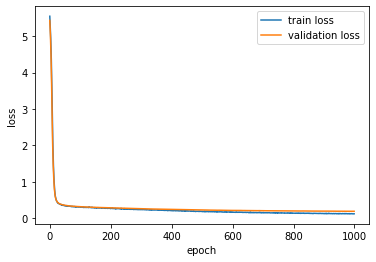

In [44]:
fig, ax = plt.subplots()
plt.plot(alldf["epoch"],alldf["trainloss"], label="train loss")
plt.plot(alldf["epoch"],alldf["valloss"], label="validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
ax.legend()
plt.show()

#### point : early stopping is needed in order to avoid overfitting

In [45]:
train_preds = model(train_X.to(device)).to("cpu")

In [46]:
train_preds2 = torch.max(train_preds.data,1)[1]

<a id="accuracy-score"></a>
### 3.11 Accuracy score

#### sklearn has already Accuracy function

In [47]:
print(f"Train sklearn accuracy: {accuracy_score(train_Y,train_preds2)}")

Train sklearn accuracy: 0.9563318777292577


In [48]:
# functionalize accuracy calculation
def calc_accuracy(x,y,model):
    model.to("cpu")
    preds = model(x)
    preds2 = torch.max(preds.data,1)[1]
    model.to(device)
    return accuracy_score(y,preds2)

In [49]:
print(f"Train accuracy: {round(calc_accuracy(train_X,train_Y,model)*100,2)}%")

Train accuracy: 95.63%


In [50]:
print(f"Validation accuracy: {round(calc_accuracy(val_X,val_Y,model)*100,2)}%")

Validation accuracy: 94.32%


<a id="train"></a>
## 4. Train

### Strategy: Save model on best validation score update using calc_accuracy

In [51]:
all_trainloss = []
all_valloss = []

all_trainscore = []
all_valscore = []

allres=[]

bestscore = 0

model=Source_FixedNet() # model instance
model.to(device)
criterion = nn.CrossEntropyLoss() # how to calculate loss function

optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # Algo for optimizing weight

for epoch in tqdm(range(1000)):
    
    model,trainloss = training(train_dataloader,model)
    
    preds,valloss = valeval(val_dataloader,model)
    
    trainscore = calc_accuracy(train_X,train_Y,model)
    
    valscore = calc_accuracy(val_X,val_Y,model)
    
    allres.append([epoch,trainloss,valloss,trainscore,valscore])
    
    if bestscore <valscore:
        
        bestscore = valscore
        state = {
                    'state_dict': model.state_dict(),
                    'optimizer_dict': optimizer.state_dict(),
                    "bestscore":bestscore
                }
        

        torch.save(state, "drive/MyDrive/SFDA/source_pretrained_weights/01/model1.pth.tar")
        
    else:
        pass

True


100%|██████████| 1000/1000 [00:30<00:00, 32.50it/s]


In [52]:
print(f"Best accuracy score: {round(bestscore*100,2)}%")

Best accuracy score: 94.32%


In [53]:
resdf = pd.DataFrame(allres)
resdf.columns=["epoch","trainloss","valloss","trainscore","valscore"]

In [54]:
resdf.head()

,epoch,trainloss,valloss,trainscore,valscore
0,0,0.575942,0.554727,0.782751,0.786026
1,1,0.550760,0.544920,0.782751,0.786026
2,2,0.544971,0.540485,0.782751,0.786026
3,3,0.541874,0.537919,0.782751,0.786026
4,4,0.536460,0.536158,0.782751,0.786026


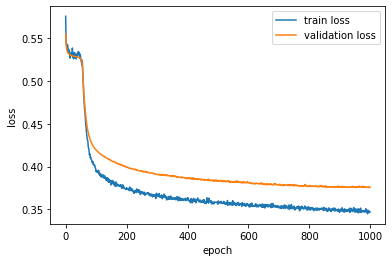

In [55]:
fig, ax = plt.subplots()
plt.plot(resdf["epoch"],resdf["trainloss"], label="train loss")
plt.plot(resdf["epoch"],resdf["valloss"], label="validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
ax.legend()
plt.show()

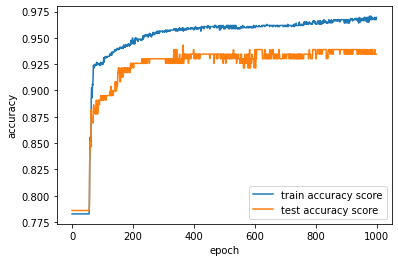

In [56]:
fig, ax = plt.subplots()
plt.plot(resdf["epoch"],resdf["trainscore"], label="train accuracy score")
plt.plot(resdf["epoch"],resdf["valscore"], label="test accuracy score")
plt.xlabel("epoch")
plt.ylabel("accuracy")
ax.legend()
plt.show()

In [ ]:
import os
os.chdir('/content/drive/MyDrive/SFDA')
!pip install easydl

In [ ]:
!python SFDA_train.py --config office-train-config.yaml

In [ ]:
!python SFDA_test.py --config office-train-config.yaml